Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Data
Variable

Description

Loan_ID

Unique Loan ID

Gender

Male/ Female

Married

Applicant married (Y/N)

Dependents

Number of dependents

Education

Applicant Education (Graduate/ Under Graduate)

Self_Employed

Self employed (Y/N)

ApplicantIncome

Applicant income

CoapplicantIncome

Coapplicant income

LoanAmount

Loan amount in thousands

Loan_Amount_Term

Term of loan in months

Credit_History

credit history meets guidelines

Property_Area

Urban/ Semi Urban/ Rural

Loan_Status

Loan approved (Y/N)

 

Note: 

Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.
You are expected to upload the solution in the format of "sample_submission.csv"

In [131]:
import pandas as pd 
import numpy as np 
import matplotlib as plt


#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
train_df=pd.read_csv("train_ctrUa4K.csv")


In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Looking at the above we understand that ApplicantIncome as a lot of extreme values, lets first see the distribution of the same 


In [6]:
train_df['ApplicantIncome'].hist(bins=50)

Let's build the boxplot to see the extreme values

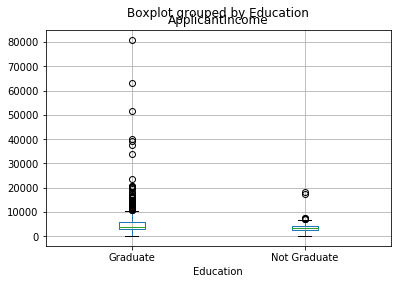

In [7]:
train_df.boxplot(column='ApplicantIncome', by = 'Education')

We see that the mean values of Graduate and Non graduate is almost same, however Graduates have higher income and extreme values, let's try to find out the relationship by Gender


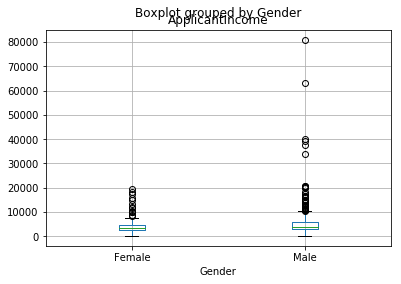

In [8]:
train_df.boxplot(column='ApplicantIncome', by = 'Gender')

Here also, we see that the mean values of Male and female are almost same, however Males have higher income and extreme values

In [9]:
#Let's find out how many null numbers we have 


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# We have many null values, hence we can''t remove them. Let's first find out mode for Gender

train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
# Since Gender is a categorical variable, let's replace the null values with Mode

train_df['Gender'].fillna('Male',inplace=True)

# Also replace the string Male and Female with 1s and 0s

train_df['Gender']=train_df['Gender'].map({'Male':1,'Female':0})

In [14]:
train_df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [15]:
# do the same for Married
train_df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
train_df['Married'].fillna('Yes',inplace=True)

# Since it's a string value, we should convert it into 0s and 1s, for our model to be able to work on this 

train_df['Married']=train_df['Married'].map({'Yes':1,'No':0})

In [18]:
#let's find it out for Dependents 
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

In [20]:
#mostly it's 0 dependents 

train_df['Dependents'].fillna(0,inplace=True)

#Let's also remove +, because it is not readable by the model 




In [19]:
train_df['Dependents'].str.replace('+','')
train

0        0
1        1
2        0
3        0
4        0
5        2
6        0
7        3
8        2
9        1
10       2
11       2
12       2
13       0
14       2
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       0
23       2
24       1
25       0
26       0
27       2
28       0
29       2
      ... 
584      1
585      1
586      0
587      0
588      0
589      2
590      0
591      2
592      3
593      0
594      0
595      0
596      2
597    NaN
598      0
599      2
600      3
601      0
602      3
603      0
604      1
605      0
606      1
607      2
608      0
609      0
610      3
611      1
612      2
613      0
Name: Dependents, Length: 614, dtype: object

In [23]:
# Let's find it out for self employed
train_df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [22]:
#Mode is No
train_df['Self_Employed'].fillna('No',inplace=True)

#Also replace strings with 0s and 1s

train_df['Self_Employed']=train_df['Self_Employed'].map({'No':0,'Yes':1})


In [26]:
# Let's find it out for credit history
train_df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [25]:
#Let's replace this with mode as well 
train_df['Credit_History'].fillna(1.0,inplace=True)

In [27]:
train_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
#Treating Loan status
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [29]:
train_df['Loan_Status'].map({'Y':1,'N':0})

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

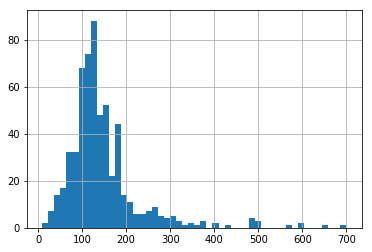

In [31]:
#Treating Loan Amount, filling null values
train_df['LoanAmount'].hist(bins=50)

We see that the curve is left skewed, therefore a Mean would not be a good estimate to fill the null values, can we take median? 

In [36]:
train_df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [33]:
train_df['LoanAmount'].median()

128.0

In [37]:
train_df['LoanAmount'].mode()

0    120.0
dtype: float64

Let's find out what is the relationship between Loan amount and employedness and education

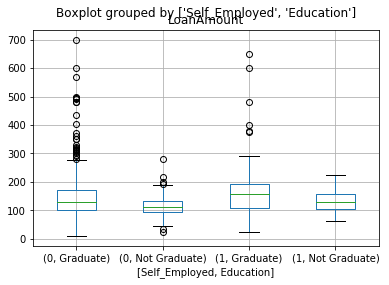

In [39]:
train_df.boxplot(column='LoanAmount',by=['Self_Employed','Education'])

We see that a good amount of variation exists in the medians of Self employed and Graduates, the median of Graduate and Self employed is the highest, therefore let's build a pivot table to find out. 



In [56]:

pivottable = train_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median) 
pivottable

Education,Graduate,Not Graduate
Self_Employed,,
0,130.0,113.0
1,157.5,130.0


Next we need to define a function to return the value of this pivot table at the intersection and then predict the loan amount. 

In [57]:
def floanamt(x):
    return table.loc[x['Self_Employed'],x['Education']]


#table.loc[0,'Graduate']


Next, we need to call this function to fill the na

In [58]:
train_df['LoanAmount'].fillna(train_df[train_df['LoanAmount'].isnull()].apply(floanamt,axis=1),inplace=True)

Let's treat the extreme values now. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let's try a log transformation to nullify their effect:



In [62]:
 train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'])

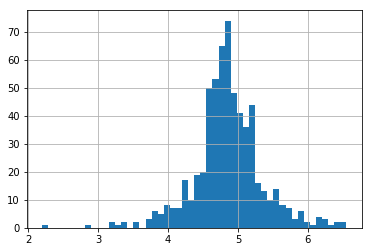

In [64]:
#Let's see the impact now in the histogram
train_df['LoanAmount_log'].hist(bins=50)


The curve is near normal, also the effect of extreme values is removed. 

Treating Applicant income, it is quite normal that some people might have lower income, however their co applicants may have income to satisfy the eligibility requirement. Also we know that co-applicant income is also equally important in the loan decision, so we will combine the two incomes into total income. 

In [ ]:



train_df['TotalIncome']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
train_df.isnull().sum()

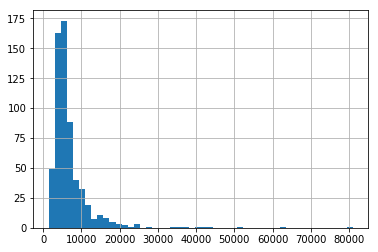

In [61]:
train_df['TotalIncome'].hist(bins=50)

Again, we will do log transformation of this total income 

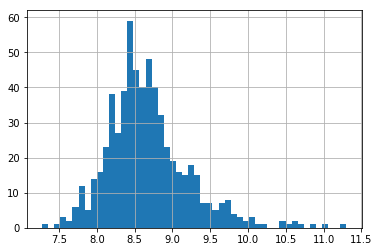

In [65]:
train_df['TotalIncome_Log']=np.log(train_df['TotalIncome'])
train_df['TotalIncome_Log'].hist(bins=50)

Cool, that makes both Total income and Applicant income as normal. 
By the way we forgot to covert education into binary, let's do it 

In [66]:
train_df['Education']=train_df['Education'].map({'Graduate':1,'Not Graduate':0})

In [67]:
train_df['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [69]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,TotalIncome_Log
0,LP001002,1,0,0,1,0,5849,0.0,130.0,360.0,1.0,Urban,Y,5849.0,4.867534,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,4.852030,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,4.189655,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,4.787492,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,4.948760,8.699515


In [75]:
#Treating Loan Status
train_df['Loan_Status']=train_df['Loan_Status'].map({'Y':1,'N':0})

In [79]:
#Treating Propery Area
train_df['Property_Area'].value_counts()
train_df['Property_Area']=train_df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})

In [83]:
# Let's see what is the relationship between Credit History and Loan Status

table1=train_df.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=np.mean)
print('Probabilty of getting loan with Credit history is \n',table1)


Probabilty of getting loan with Credit history is 
                 Loan_Status
Credit_History             
0.0                0.078652
1.0                0.790476


So we see that people with credit history have higher chances of getting a loan. Let's visualize the same

Loan_Status       0    1
Credit_History          
0.0              82    7
1.0             110  415


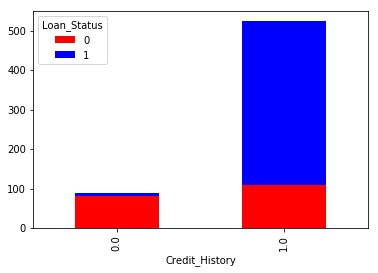

In [85]:
temp3 = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status']) 
print(temp3)
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [86]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,TotalIncome_Log
0,LP001002,1,0,0,1,0,5849,0.0,130.0,360.0,1.0,2,1,5849.0,4.867534,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0,6091.0,4.852030,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,4.189655,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,4.787492,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,4.948760,8.699515


In [100]:
# We also need to take care of Loan Amount Term, we know that we have about 14 null values there. Let's see a value count
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

We see most of the loans have terms = 360, so we will fill the blanks with Mode, i.e. 360

In [101]:
train_df['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [102]:
train_df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [103]:
#Let's see what is the relationship between Loan Amount term and Loan approval
table3 = train_df.pivot_table(values='Loan_Status',index='Loan_Amount_Term',aggfunc=np.mean)

In [104]:
print(table3.sort_values(by='Loan_Status',ascending=False))

                  Loan_Status
Loan_Amount_Term             
12.0                 1.000000
60.0                 1.000000
120.0                1.000000
84.0                 0.750000
240.0                0.750000
360.0                0.697719
180.0                0.659091
300.0                0.615385
480.0                0.400000
36.0                 0.000000


We see tha, there is 100% probability for a Loan term of 12, 60 and 120 for getting loan, where's the probability of getting a loan for term 84, 240,360,180,300 is in the range of 60-75. Loan with term 480 have a very low proability and loan with term 36 have 0 probabilty 

Let's categorize them into three columns 



In [105]:
train_df['Loan_Term_1']=train_df['Loan_Amount_Term'].map(lambda x: 1 if x in {12.0,60.0,120} else 0)

In [122]:
train_df['Loan_Term_2']=train_df['Loan_Amount_Term'].map(lambda x: 1 if x in {84.0,240.0,360,180,300} else 0)

In [123]:
train_df['Loan_Term_3']=train_df['Loan_Amount_Term'].map(lambda x: 1 if x in {36.0,480.0} else 0)

In [127]:
train_df[['Loan_Amount_Term','Loan_Term_1','Loan_Term_2','Loan_Term_3']]

,Loan_Amount_Term,Loan_Term_1,Loan_Term_2,Loan_Term_3
0,360.0,0,1,0
1,360.0,0,1,0
2,360.0,0,1,0
3,360.0,0,1,0
4,360.0,0,1,0
5,360.0,0,1,0
6,360.0,0,1,0
7,360.0,0,1,0
8,360.0,0,1,0
9,360.0,0,1,0


In [200]:
train_df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log,TotalIncome_Log,Loan_Term_1,Loan_Term_2,Loan_Term_3,Loan_Status2
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.106096,-0.074030,0.009170,0.109521,0.017987,0.093191,0.142339,0.167285,0.046922,0.017869,-0.048812,0.009170
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.146279,-0.100912,0.010938,-0.007281,0.091478,0.083319,0.179366,0.151527,0.002833,0.090480,-0.106411,0.010938
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.173683,0.073928,0.073658,-0.066740,0.085884,0.161362,0.152593,0.204861,-0.027680,0.041125,-0.030998,0.073658
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.120030,-0.033739,-0.001550,0.007124,-0.003700,0.113000,0.115678,0.176709,0.058343,0.001807,-0.037070,-0.001550
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565940,-0.046531,-0.018615,0.017321,-0.004710,0.893037,0.436463,0.717829,-0.025368,0.039890,-0.030956,-0.018615
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.188128,-0.059383,0.011134,0.019087,-0.059187,0.342781,0.204967,0.383827,-0.000473,0.036521,-0.041982,0.011134
LoanAmount,0.106096,0.146279,0.173683,0.120030,0.565940,0.188128,1.000000,0.038536,-0.000630,0.026301,-0.031618,0.620540,0.895868,0.688600,-0.082035,0.039030,0.004014,-0.000630
Loan_Amount_Term,-0.074030,-0.100912,0.073928,-0.033739,-0.046531,-0.059383,0.038536,1.000000,-0.004705,-0.016086,-0.022549,-0.070917,0.087421,-0.056044,-0.401844,0.014848,0.223737,-0.004705
Credit_History,0.009170,0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.000630,-0.004705,1.000000,-0.033102,0.540556,-0.012563,-0.018373,0.020791,0.040901,0.016229,-0.043304,1.000000
Property_Area,0.109521,-0.007281,-0.066740,0.007124,0.017321,0.019087,0.026301,-0.016086,-0.033102,1.000000,-0.137545,0.025032,0.037685,0.038691,-0.029931,0.073481,-0.067095,-0.033102


In [159]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy, simply calculating the accurancy from the confusion matrix, i.e. (TP+TN)/(TP+TN+FP+FN)
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))
  
  #Perform k-fold cross-validation with 5 folds
 # kf = KFold()
  #error = []
  #for train, test in kf.split(X):
    # Filter training data
   # train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    #train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    #model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    #error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  #print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  #model.fit(data[predictors],data[outcome]) 
  cm=confusion_matrix(predictions,data[outcome])
  print(cm)
  print(predictions)
  train_df['Loan_Status2']=predictions

Accuracy : 80.945%
[[ 82   7]
 [110 415]]
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1

C:\Users\spgarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [162]:
train_df.to_csv('train2.csv')

In [164]:
model = DecisionTreeClassifier()
classification_model(model,train_df,predictor_var,outcome_var)

Accuracy : 100.000%
[[192   0]
 [  0 422]]
[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 

#Now we have a classifier model, so let's build it on the test data, We would do the data munging the same way as we did on the train data. so let's begin




In [179]:
#Loading the test data
test_df=pd.read_csv("test_lAUu6dG.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [180]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [181]:
test_df.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [182]:
test_df.Gender.fillna("Male",inplace=True)


In [184]:
test_df.Gender=test_df.Gender.map({'Male':1,'Female':0})

In [185]:
test_df.Gender.value_counts()

1    297
0     70
Name: Gender, dtype: int64

In [187]:
test_df.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [188]:
test_df.Self_Employed.fillna("No",inplace=True)

In [189]:
test_df.Self_Employed=test_df.Self_Employed.map({'Yes':1,'No':0})

In [190]:
test_df.Self_Employed.value_counts()

0    330
1     37
Name: Self_Employed, dtype: int64

In [191]:
test_df.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [194]:
test_df.Loan_Amount_Term.fillna(360.0,inplace=True)

In [195]:
test_df.Loan_Amount_Term.value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [201]:
test_df.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [202]:
test_df.Credit_History.fillna(1.0,inplace=True)

In [203]:
test_df.Credit_History.value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

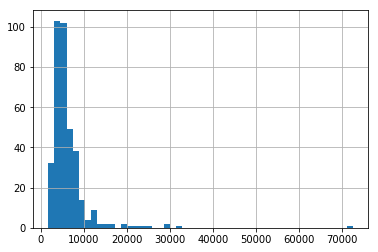

In [204]:
test_df['TotalIncome']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']
test_df['TotalIncome'].hist(bins=50)

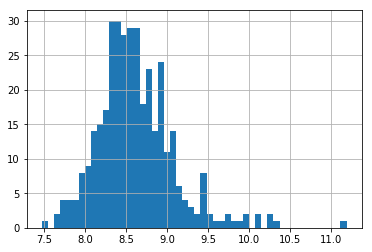

In [206]:
test_df['TotalIncome_Log']=np.log(test_df['TotalIncome'])
test_df['TotalIncome_Log'].hist(bins=50)

In [207]:
test_df['LoanAmount'].describe()

count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64

In [208]:
test_df['LoanAmount'].median()

125.0

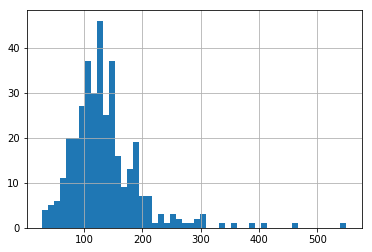

In [209]:
test_df['LoanAmount'].hist(bins=50)

In [210]:
test_df['LoanAmount'].fillna(125.0,inplace=True)

In [211]:
test_df['LoanAmount_log']=np.log(test_df['LoanAmount'])

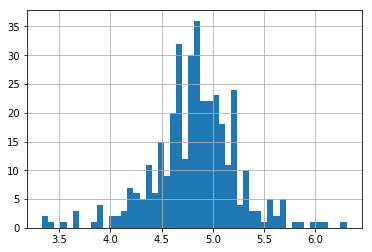

In [212]:
test_df['LoanAmount_log'].hist(bins=50)

In [216]:
test_df['Married']=test_df['Married'].map({'Yes':1,'No':0})

In [218]:
test_df.Education=test_df.Education.map({'Graduate':1,'Not Graduate':0})
test_df['Property_Area']=test_df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})

In [219]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_Log,LoanAmount_log
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,5720,8.651724,4.700480
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,4576,8.428581,4.836282
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,6800,8.824678,5.337538
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,4886,8.494129,4.605170
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,3276,8.094378,4.356709


In [221]:
# Prediction using LogisticRegression

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','LoanAmount_log','TotalIncome_Log','Gender','Married','Education','Self_Employed','Property_Area']
model.fit(train_df[predictor_var],train_df[outcome_var])
predictions = model.predict(test_df[predictor_var])

C:\Users\spgarg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [226]:
print(predictions)
print(len(predictions))
output_df=pd.DataFrame()
output_df['Loan_ID']=test_df['Loan_ID']
output_df['Loan_Status']=predictions
output_df['Loan_Status']=output_df['Loan_Status'].map({1:'Y',0:'N'})
output_df.to_csv("Test.csv")

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
367


In [227]:
# Prediction using Decision Tree

outcome_var = 'Loan_Status'
model2 = DecisionTreeClassifier()
predictor_var = ['Credit_History','LoanAmount_log','TotalIncome_Log','Gender','Married','Education','Self_Employed','Property_Area']
model2.fit(train_df[predictor_var],train_df[outcome_var])
predictions2 = model2.predict(test_df[predictor_var])

In [230]:
print(predictions2)
print(len(predictions2))
output_df2=pd.DataFrame()
output_df2['Loan_ID']=test_df['Loan_ID']
output_df2['Loan_Status']=predictions2
output_df2['Loan_Status']=output_df2['Loan_Status'].map({1:'Y',0:'N'})
output_df2.to_csv("Test2.csv")

[1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0
 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1
 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1]
367
